# import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity

%matplotlib inline

In [2]:
%run ../IBMCheck.ipynb

-- Ignoring SSL errors.  This is not recommended --
Credits: {'remaining': 15, 'promotional': 0, 'maxUserType': 15}


Backends loaded:
ibmq_qasm_simulator
ibmqx4
ibmqx2
ibmq_16_melbourne


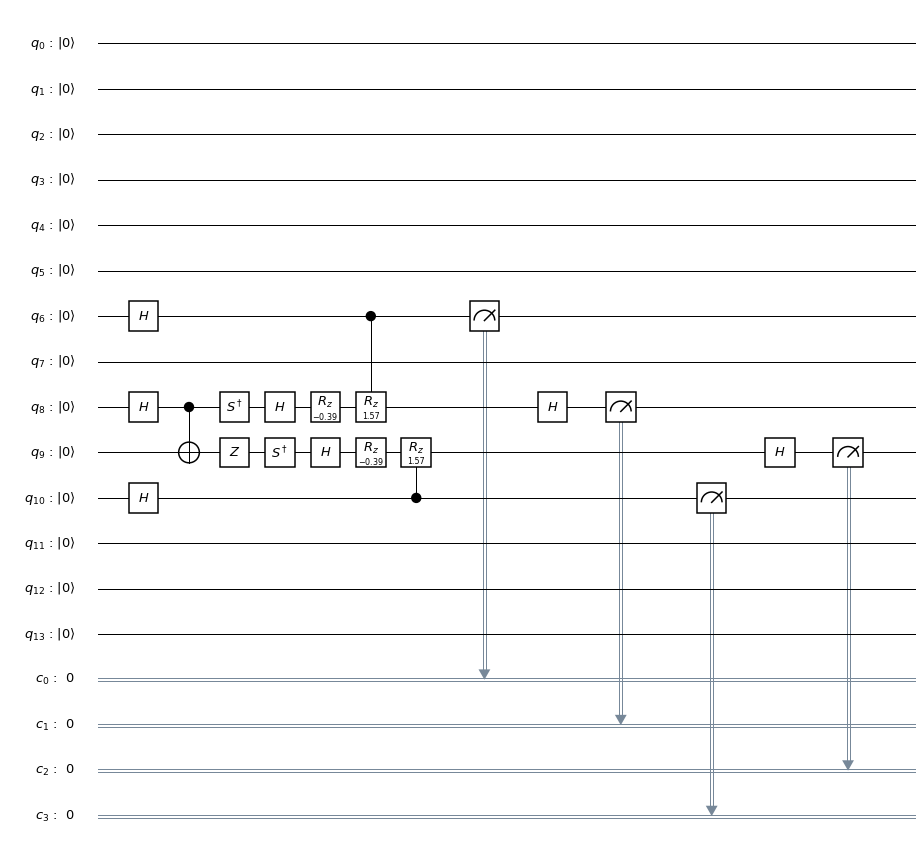

In [3]:
from math import pi

def basic_chsh_circuit(numqubits,x,a,b,y):
    chsh = QuantumCircuit(numqubits,4)
    chsh.h(x)
    chsh.h(a)
    chsh.cx(a, b)
    chsh.z(b)
    chsh.h(y)
    chsh.sdg(a)
    chsh.h(a)
    chsh.rz(-pi/8,a)
    chsh.crz(pi/2,x,a)
    chsh.h(a)
    #chsh.u3(-pi/8,0,0,a)
    #chsh.cu3(pi/2,0,0,x,a)
    chsh.sdg(b)
    chsh.h(b)
    chsh.rz(-pi/8,b)
    chsh.crz(pi/2,y,b)
    chsh.h(b)
    #chsh.u3(-pi/8,0,0,b)
    #chsh.cu3(pi/2,0,0,y,b)
    chsh.measure([x,a,b,y], [0,1,2,3])    
    return chsh

def basic_chsh_circuit_2(numqubits,x,a,b,y):
    q = QuantumRegister(numqubits)
    clx = ClassicalRegister(1)
    cla = ClassicalRegister(1)
    clb = ClassicalRegister(1)
    cly = ClassicalRegister(1)
    chsh = QuantumCircuit(q,clx,cla,clb,cly)
    chsh.h(x)
    chsh.measure(x,clx)       
    chsh.h(y)    
    chsh.measure(y,cly)   
    chsh.h(a)
    chsh.cx(a, b)
    chsh.z(b)
    chsh.u3(-pi/8,0,0,a).c_if(clx,0)
    chsh.u3(3*pi/8,0,0,a).c_if(clx,1)    
    #chsh.u3(-pi/8,0,0,a)
    #chsh.cu3(pi/2,0,0,x,a)
    chsh.u3(-pi/8,0,0,b).c_if(cly,0)
    chsh.u3(3*pi/8,0,0,b).c_if(cly,1)  
    #chsh.u3(-pi/8,0,0,b)
    #chsh.cu3(pi/2,0,0,y,b)
    chsh.measure(a,cla)
    chsh.measure(b,clb)  
    return chsh

def eval_chsh_counts(counts):
    pos=0
    every=0
    for i in range (0,16): 
        bits='{0:04b}'.format(i)
        succ=(bool(int(bits[1]))!=bool(int(bits[2])))==(bool(int(bits[0]))&bool(int(bits[3])))
        #print(bits+" "+str(succ))
        if bits in counts:
            every+=counts[bits]
            if succ:
                pos+=counts[bits]
        bits=bits.replace("", " ")[1: -1]
        if bits in counts:
            every+=counts[bits]
            if succ:
                pos+=counts[bits]
    return pos/every

chsh=basic_chsh_circuit(14,6,8,9,10)
#chsh=basic_chsh_circuit_2(14,5,9,8,6)
chsh.draw(output='mpl')

0.8553466796875


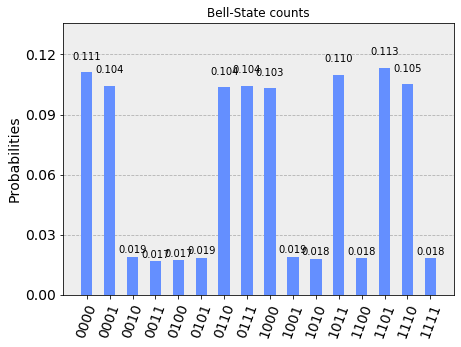

In [4]:
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

from qiskit.providers.aer import QasmSimulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(chsh, simulator,shots=8192).result()
counts = result.get_counts(chsh)
print(eval_chsh_counts(counts))
plot_histogram(counts, title='Bell-State counts')

Job Status: job has successfully run
0.7210693359375


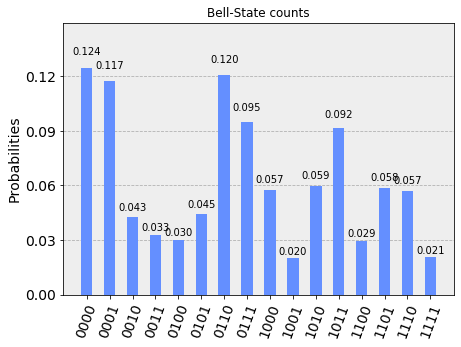

In [5]:
from qiskit.tools.monitor import job_monitor

# Number of shots to run the program (experiment);
# maximum is 8192 shots.
shots = 8192
# Maximum number of credits to spend on executions.
max_credits = 1

job_exp = execute(chsh, hws["ibmq_16_melbourne"], shots=shots, max_credits=max_credits)
job_monitor(job_exp)

counts=job_exp.result().get_counts()
print(eval_chsh_counts(counts))
plot_histogram(counts, title='Bell-State counts')

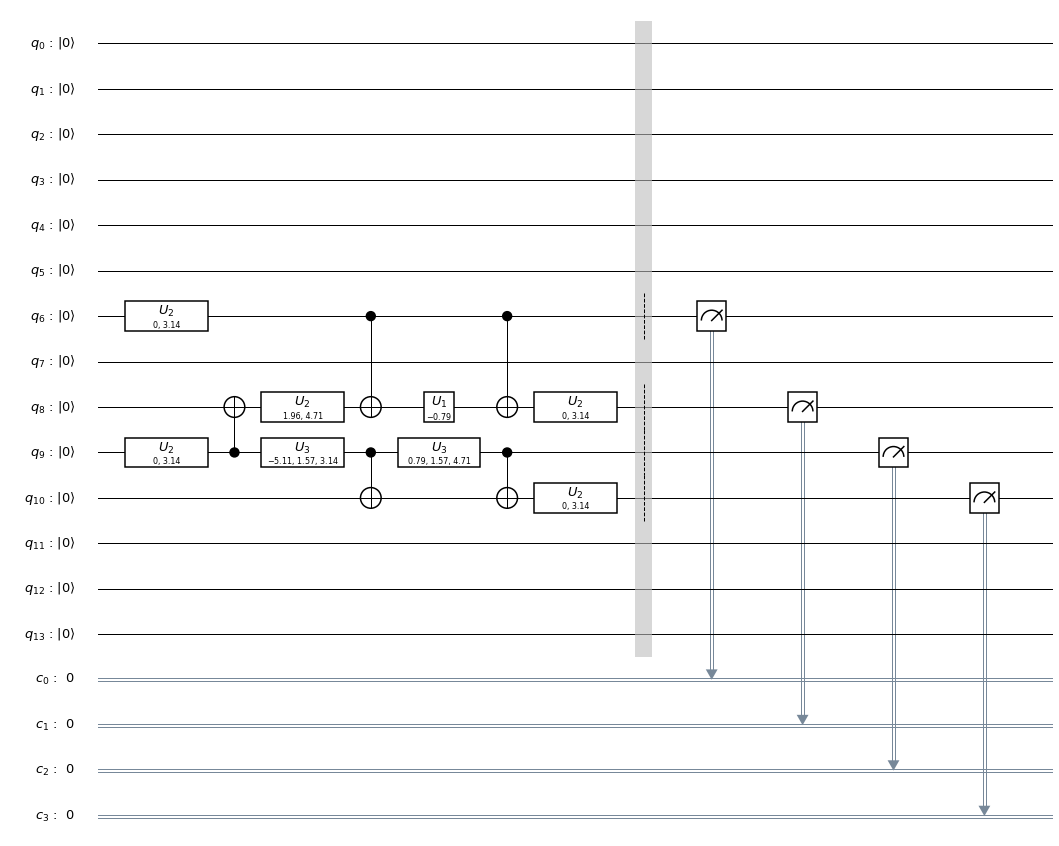

In [6]:
import qiskit as qk
#qobj=qk.compile(chsh,hws["ibmq_16_melbourne"],shots=1024)
chsh_compiled=qk.compiler.transpile(chsh,backend=hws["ibmq_16_melbourne"])
chsh_compiled.draw(output='mpl')# circuit gets optimized automatically

Job Status: job has successfully run
0.723388671875


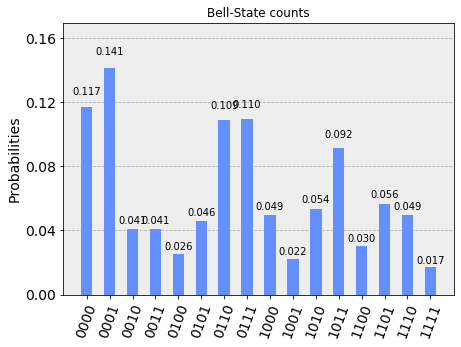

In [7]:
from qiskit.tools.monitor import job_monitor

# Number of shots to run the program (experiment);
# maximum is 8192 shots.
shots = 8192
# Maximum number of credits to spend on executions.
max_credits = 1

job_exp = execute(chsh_compiled, hws["ibmq_16_melbourne"], shots=shots, max_credits=max_credits)
job_monitor(job_exp)

counts=job_exp.result().get_counts()
print(eval_chsh_counts(counts))
plot_histogram(counts, title='Bell-State counts')